In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('AAPL_data.csv')

In [3]:
data.head()

,Date,Adj Close,Close,High,Low,Open,Volume
0,12-12-1980,0.098834,0.128348,0.128906,0.128348,0.128348,469033600
1,15-12-1980,0.093678,0.121652,0.122210,0.121652,0.122210,175884800
2,16-12-1980,0.086802,0.112723,0.113281,0.112723,0.113281,105728000
3,17-12-1980,0.088951,0.115513,0.116071,0.115513,0.115513,86441600
4,18-12-1980,0.091530,0.118862,0.119420,0.118862,0.118862,73449600


In [4]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11084 entries, 0 to 11083
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       11084 non-null  object 
 1   Adj Close  11084 non-null  float64
 2   Close      11084 non-null  float64
 3   High       11084 non-null  float64
 4   Low        11084 non-null  float64
 5   Open       11084 non-null  float64
 6   Volume     11084 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 606.3+ KB
None


In [5]:
data['Date'] = pd.to_datetime(data['Date'], format='%d-%m-%Y')
print(data['Date'])

0       1980-12-12
1       1980-12-15
2       1980-12-16
3       1980-12-17
4       1980-12-18
           ...    
11079   2024-11-22
11080   2024-11-25
11081   2024-11-26
11082   2024-11-27
11083   2024-11-29
Name: Date, Length: 11084, dtype: datetime64[ns]


In [6]:
data.sort_values('Date', inplace=True)

In [7]:
data.set_index('Date', inplace=True)

In [8]:
close_data = data['Close']

In [9]:
close_data.head()

Date
1980-12-12    0.128348
1980-12-15    0.121652
1980-12-16    0.112723
1980-12-17    0.115513
1980-12-18    0.118862
Name: Close, dtype: float64

In [10]:
close_data.describe()

count    11084.000000
mean        23.891777
std         49.215566
min          0.049107
25%          0.300223
50%          0.539733
75%         21.060982
max        237.330002
Name: Close, dtype: float64

In [11]:
close_data.isnull().sum()

0

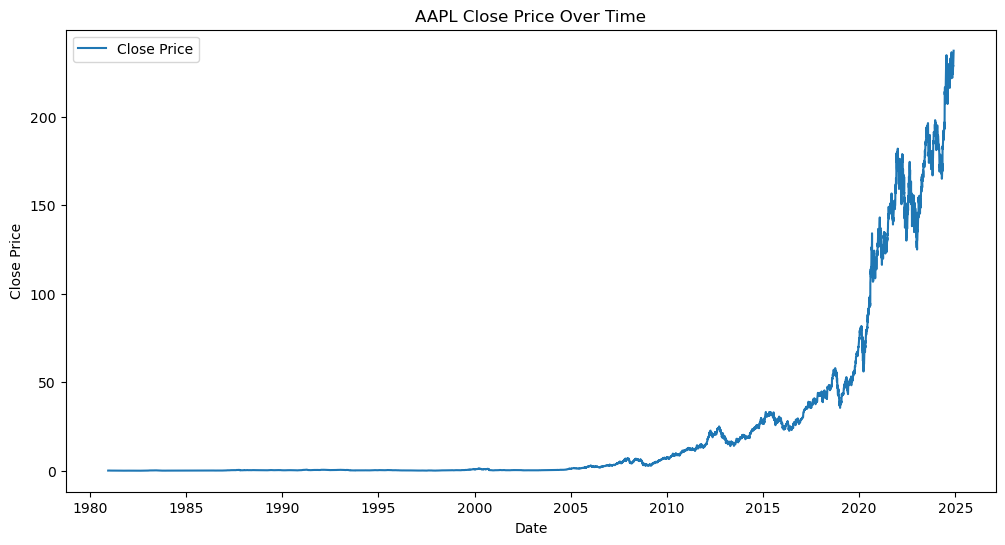

In [12]:
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

# Visualizing the 'Close' data over time
plt.figure(figsize=(12, 6))
plt.plot(close_data, label='Close Price')
plt.title('AAPL Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()



In [13]:
#ADF tset
adf_test = adfuller(close_data)
adf_results = {
    "ADF Statistic": adf_test[0],
    "p-value": adf_test[1],
    "Critical Values": adf_test[4],
}


In [14]:
adf_results


{'ADF Statistic': 4.227381260797084,
 'p-value': 1.0,
 'Critical Values': {'1%': -3.4309422510477696,
  '5%': -2.8618017424577933,
  '10%': -2.566909320386296}}

In [15]:
# Perform differencing to make the data stationary
diff_close_data = close_data.diff().dropna()


In [16]:
#ADF test
adf_test_diff = adfuller(diff_close_data)
adf_diff_results = {
    "ADF Statistic": adf_test_diff[0],
    "p-value": adf_test_diff[1],
    "Critical Values": adf_test_diff[4],
}

In [17]:
if(adf_test_diff[1] <= 0.5):
    print("True")
else:
    print("False")

True


In [18]:
adf_diff_results

{'ADF Statistic': -17.7124674328066,
 'p-value': 3.497302036118693e-30,
 'Critical Values': {'1%': -3.4309423046915986,
  '5%': -2.8618017661630577,
  '10%': -2.5669093330045536}}

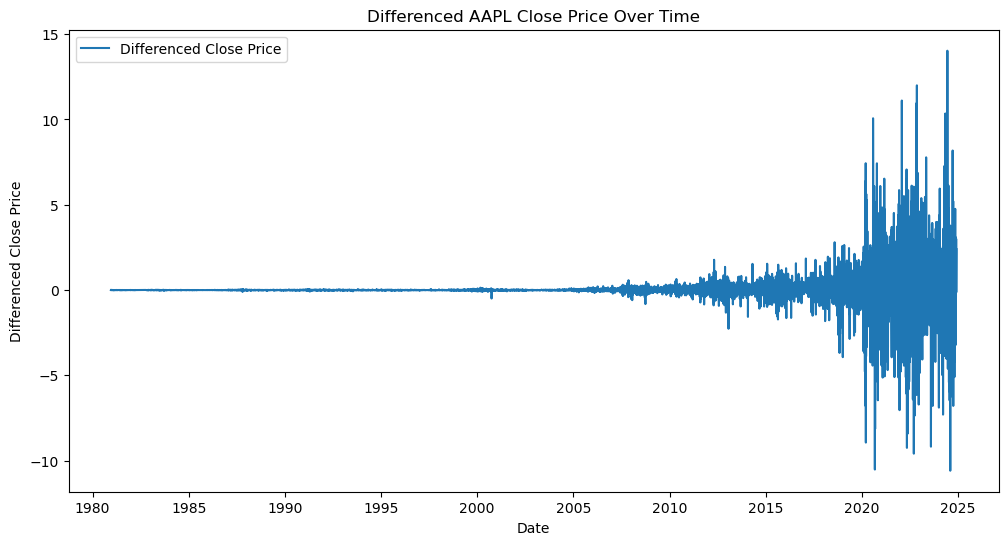

In [19]:
# Visualizing the differenced data
plt.figure(figsize=(12, 6))
plt.plot(diff_close_data, label='Differenced Close Price')
plt.title('Differenced AAPL Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Differenced Close Price')
plt.legend()
plt.show()




In [20]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

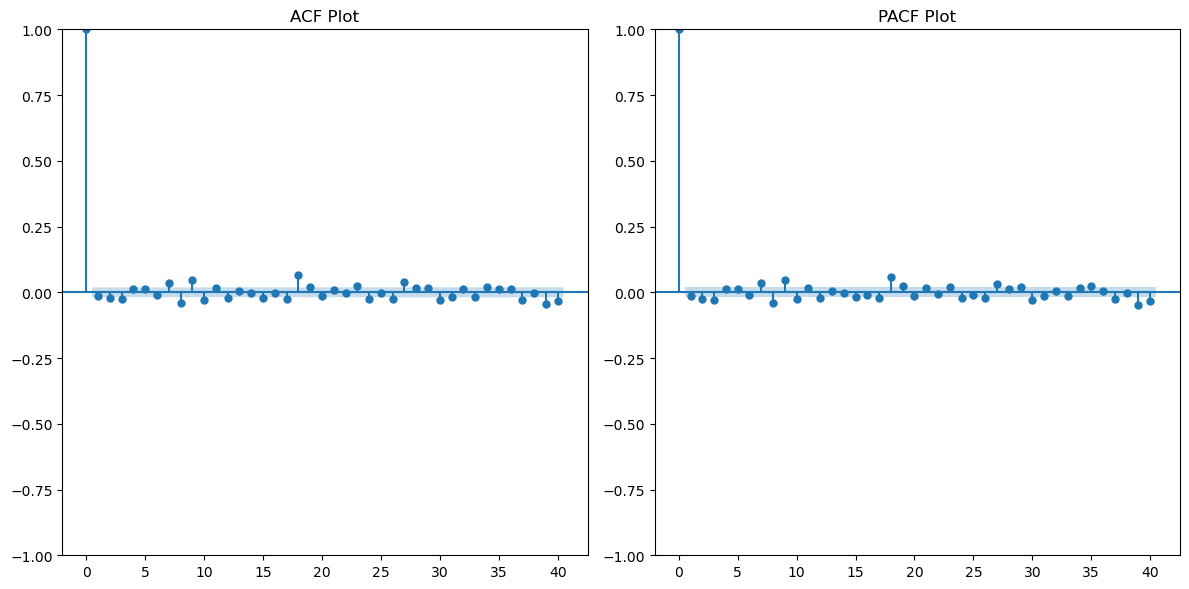

In [21]:
# ACF and PACF plots
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plot_acf(diff_close_data, ax=plt.gca(), lags=40)
plt.title('ACF Plot')

plt.subplot(1, 2, 2)
plot_pacf(diff_close_data, ax=plt.gca(), lags=40, method='ywm')
plt.title('PACF Plot')

plt.tight_layout()
plt.show()

In [22]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error, mean_absolute_percentage_error
import numpy as np


In [23]:
seasonal_period = 12

#SARIMA model
sarima_model = SARIMAX(close_data,
                       order=(1, 1, 1),  # Non-seasonal parameters (p, d, q)
                       seasonal_order=(1, 1, 1, seasonal_period),  # Seasonal parameters (P, D, Q, s)
                       enforce_stationarity=False,
                       enforce_invertibility=False)
sarima_result = sarima_model.fit(disp=False)



C:\Users\ramsu\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ramsu\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [24]:
print(sarima_result.summary())

                                     SARIMAX Results                                      
Dep. Variable:                              Close   No. Observations:                11084
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood              -14959.045
Date:                            Sat, 08 Feb 2025   AIC                          29928.089
Time:                                    22:15:29   BIC                          29964.643
Sample:                                         0   HQIC                         29940.401
                                          - 11084                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5763      0.066      8.757      0.000       0.447       0.705
ma.L1         -0.6000      0.065   

In [48]:
# Forecast next 1000 days
forecast_steps = 1000
forecast_sarima = sarima_result.get_forecast(steps=forecast_steps)
forecast_values = forecast_sarima.predicted_mean
forecast_conf_int = forecast_sarima.conf_int()



C:\Users\ramsu\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [49]:
# Evaluating the model
train_predictions = sarima_result.fittedvalues
rmse = np.sqrt(mean_squared_error(close_data, train_predictions))
r2 = r2_score(close_data, train_predictions)
mse = mean_squared_error(close_data, train_predictions)
mae= mean_absolute_error(close_data, train_predictions)
mape = mean_absolute_percentage_error(close_data, train_predictions)

In [50]:
print(f"RMSE: {rmse:.3f}")
print(f"R² Score: {r2:.4f}")
print(f"MSE: {mse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"MAPE: {mape:.4f}")     
      

RMSE: 0.933
R² Score: 0.9996
MSE: 0.8697
MAE: 0.3069
MAPE: 0.0195


In [51]:
# Plot the forecast
import matplotlib.pyplot as plt

In [52]:
forecast_dates = pd.date_range(start=close_data.index[-1], periods=forecast_steps + 1, freq='B')[1:]

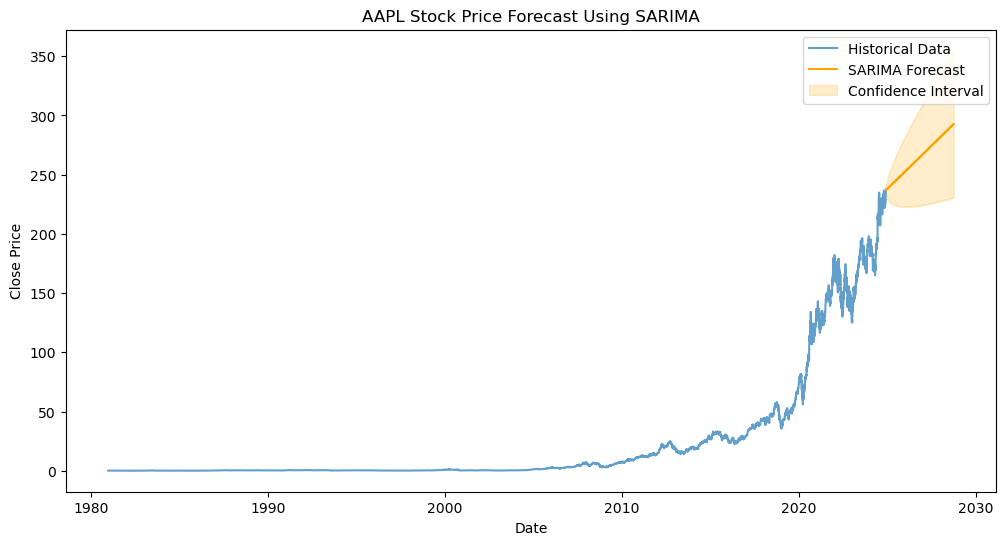

In [53]:
plt.figure(figsize=(12, 6))
plt.plot(close_data, label='Historical Data', alpha=0.7)
plt.plot(forecast_dates, forecast_values, label='SARIMA Forecast', color='orange')
plt.fill_between(
    forecast_dates,
    forecast_conf_int.iloc[:, 0],
    forecast_conf_int.iloc[:, 1],
    color='orange',
    alpha=0.2,
    label='Confidence Interval',
)
plt.title('AAPL Stock Price Forecast Using SARIMA')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()
